<a href="https://colab.research.google.com/github/khojwar/Master_Thesis/blob/main/17_training_process_only_(dont_run_again)_pos_tagging_using_lstm_gru_bilstm_without_loosing_sentence_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task success Till now are :
Step 0:
1. retrieve tags from directrie's files and store in "tags" list
2. plots bar diagram for tags
  *   One axis represents tags
  *   Other axis represents counts

step 1: Extract sentences and pos_tags from xml file

Step 2: Word Embedding with word2vec

Step 3: Preprocessing and Dataset Preparation

Step 4: Splitting dataset into 70% train, 15% val, and 15% test

Step 5: build an LSTM model using Keras  (Droupout=0.3, hidden activation='relu' and output activation='softmax')

Step 6: Compile the model (loss='sparse_categorical_crossentropy',
 optimizer = Adam(learning_rate=0.01))

Step 7: Train the LSTM model with Train and val dataset (batch_size=128, epoch=10, verbos=1)

Step 8: Evaluate the model with test dataset

Step 9: Create a plot of accuracy and loss over time

Step 10: Save the trained model

Step 11: Load the trained model

Step 12: POS Tagging with the LSTM Model

# Features, limitation and recomendation for user
1. If input have unseen words in the sentences. It assign the word by "UNK" tag.
2. user input दिदा "बाट", "को", "का", "लाई", "ले", "मा" etc शब्द लाई छुटाइ दिदा POS TAGGING गर्दा accuracy धेरै हुन्छ, तेसैले छुतैदिनुहोला ।
3. can't deal with confilct words

In [1]:
# !pip install tensorflow
# !pip install --upgrade gensim

In [2]:
# import dependencies
import os
import xml.etree.ElementTree as ET
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Update this line
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Dropout  # Update this line

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU is NOT AVAILABLE


In [4]:
# # authenticate and mount the Google Drive
# from google.colab import drive
# drive.mount("/content/drive")

In [5]:
# # Chage directory to project folder
# %cd /content/drive/MyDrive/Nepali POS Tagging/
# %ls

# Access the book directory's xml files and create tagsets list

In [6]:
All_xml_file_path_list = []      # creating list for all xml file

nnc_updated_ah_path = '2_nnc_updated_ah/'
nnc_updated_ah_path_inner_list = os.listdir(nnc_updated_ah_path)
# nnc_updated_ah_path_inner_list

for nnc_updated_ah_path_inner in nnc_updated_ah_path_inner_list:
    # print(nnc_updated_ah_path_inner)
    nnc_updated_ah_path_inner_path = os.path.join(nnc_updated_ah_path, nnc_updated_ah_path_inner)
    # print(nnc_updated_ah_path_inner_path)
    cs_gs_folder_list = os.listdir(nnc_updated_ah_path_inner_path)
    # print(cs_gs_folder_list)

    for cs_gs_folder in cs_gs_folder_list:
        # print(cs_gs_folder)
        cs_gs_folder_inner_path = os.path.join(nnc_updated_ah_path_inner_path, cs_gs_folder)
        # print(cs_gs_folder_path)

        if os.path.isfile(cs_gs_folder_inner_path):
            print(cs_gs_folder_inner_path)              # cs .xml files
            All_xml_file_path_list.append(cs_gs_folder_inner_path)     # append cs .xml files to "All_xml_file_path_list" list

        if os.path.isdir(cs_gs_folder_inner_path):
            # print(cs_gs_folder_inner_path)
            gs_folder = os.listdir(cs_gs_folder_inner_path)
            # print(gs_folder)

            for book_journal_web_folder_inner_list in gs_folder:
                # print(book_journal_web_folder_inner_list)
                book_journal_web_folder_inner_folder_path = os.path.join(cs_gs_folder_inner_path, book_journal_web_folder_inner_list)
                # filelist3 = os.listdir(filepath)
                # print(filepath)

                if os.path.isfile(book_journal_web_folder_inner_folder_path):
                    print(book_journal_web_folder_inner_folder_path)                 # book and newspaper .xml files
                    All_xml_file_path_list.append(book_journal_web_folder_inner_folder_path)       # append book and newspaper .xml files to "All_xml_file_path_list" list

                if os.path.isdir(book_journal_web_folder_inner_folder_path):
                    # print(book_journal_web_folder_inner_folder_path)

                    book_journal_web_folder_inner_folder_list = os.listdir(book_journal_web_folder_inner_folder_path)
                    # print(book_journal_web_folder_inner_folder_list)

                    for book_journal_web_folder_inner_file in book_journal_web_folder_inner_folder_list:
                        # print(book_journal_web_folder_inner_file)
                        inner_file_path = os.path.join(book_journal_web_folder_inner_folder_path, book_journal_web_folder_inner_file)
                        print(inner_file_path)                  # webtext folder's folders .xml files
                        All_xml_file_path_list.append(inner_file_path)       # append webtext folder's folders .xml files to "All_xml_file_path_list" list



2_nnc_updated_ah/cs\a01.xml
2_nnc_updated_ah/cs\a02.xml
2_nnc_updated_ah/cs\a03.xml
2_nnc_updated_ah/cs\a04.xml
2_nnc_updated_ah/cs\a05.xml
2_nnc_updated_ah/gc\books\book-academic-jana-siksha-2058.xml
2_nnc_updated_ah/gc\books\book-academic-rupantaran-2062.xml
2_nnc_updated_ah/gc\books\book-academic-swasthya-samaj-ra-rajniti-2062.xml
2_nnc_updated_ah/gc\books\book-anthropology-sabai-jatko-fulbari-2055.xml
2_nnc_updated_ah/gc\books\book-autobiography-mero-aviral-jivangit-2060.xml
2_nnc_updated_ah/gc\newspaper-journal\himalkhabarpatrika-2056-03-16.xml
2_nnc_updated_ah/gc\newspaper-journal\himalkhabarpatrika-2056-04-01.xml
2_nnc_updated_ah/gc\newspaper-journal\himalkhabarpatrika-2056-04-16.xml
2_nnc_updated_ah/gc\newspaper-journal\himalkhabarpatrika-2056-05-01.xml
2_nnc_updated_ah/gc\newspaper-journal\himalkhabarpatrika-2056-05-16.xml
2_nnc_updated_ah/gc\webtext\m-1asphost-com-jhapalidotcom\jhapalidotcom-poetry-2061-11-27.xml
2_nnc_updated_ah/gc\webtext\m-1asphost-com-jhapalidotcom\jhapal

In [7]:
All_xml_file_path_list

['2_nnc_updated_ah/cs\\a01.xml',
 '2_nnc_updated_ah/cs\\a02.xml',
 '2_nnc_updated_ah/cs\\a03.xml',
 '2_nnc_updated_ah/cs\\a04.xml',
 '2_nnc_updated_ah/cs\\a05.xml',
 '2_nnc_updated_ah/gc\\books\\book-academic-jana-siksha-2058.xml',
 '2_nnc_updated_ah/gc\\books\\book-academic-rupantaran-2062.xml',
 '2_nnc_updated_ah/gc\\books\\book-academic-swasthya-samaj-ra-rajniti-2062.xml',
 '2_nnc_updated_ah/gc\\books\\book-anthropology-sabai-jatko-fulbari-2055.xml',
 '2_nnc_updated_ah/gc\\books\\book-autobiography-mero-aviral-jivangit-2060.xml',
 '2_nnc_updated_ah/gc\\newspaper-journal\\himalkhabarpatrika-2056-03-16.xml',
 '2_nnc_updated_ah/gc\\newspaper-journal\\himalkhabarpatrika-2056-04-01.xml',
 '2_nnc_updated_ah/gc\\newspaper-journal\\himalkhabarpatrika-2056-04-16.xml',
 '2_nnc_updated_ah/gc\\newspaper-journal\\himalkhabarpatrika-2056-05-01.xml',
 '2_nnc_updated_ah/gc\\newspaper-journal\\himalkhabarpatrika-2056-05-16.xml',
 '2_nnc_updated_ah/gc\\webtext\\m-1asphost-com-jhapalidotcom\\jhapalido

In [8]:
len(All_xml_file_path_list)

37

In [9]:
tagsets = []

for filepath in All_xml_file_path_list:

    tree = ET.parse(filepath)   # Parse an XML file and create an ElementTree object
    root = tree.getroot()   # Get the root element of the XML document
    # print(root)

    # Find all "w" elements with a "ctag" attribute
    word_elements = root.findall(".//w[@ctag]")

    # Extract POS tags
    tagset = [word.attrib["ctag"] for word in word_elements]
    tagsets.extend(tagset)

In [10]:
# # Set the path to the directory containing XML files
# path = '2_nnc_updated_ah/gc/books/'
# filelist = os.listdir(path)
# filelist

In [11]:
# tagsets = []

# for file in filelist:
#     filepath = os.path.join(path, file)
#     # print(filepath)

#     tree = ET.parse(filepath)   # Parse an XML file and create an ElementTree object
#     root = tree.getroot()   # Get the root element of the XML document
#     # print(root)

#     # Find all "w" elements with a "ctag" attribute
#     word_elements = root.findall(".//w[@ctag]")

#     # Extract POS tags
#     tagset = [word.attrib["ctag"] for word in word_elements]
#     tagsets.extend(tagset)


In [12]:
len(tagsets)

583028

# Plot the tags and their frequency

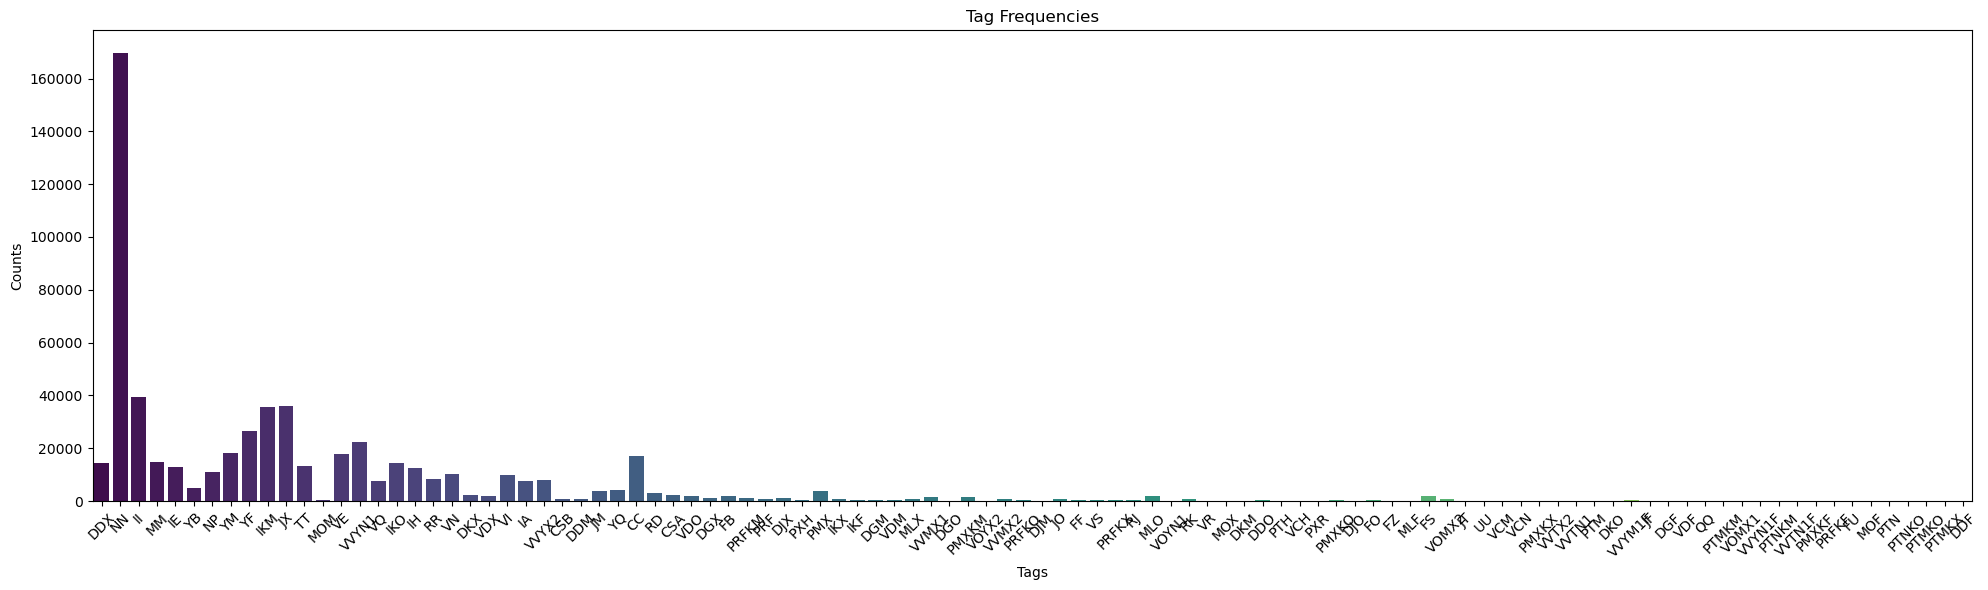

In [13]:
from collections import Counter
import pandas as pd

# Count the occurrences of each tag
tag_counts = Counter(tagsets)

# Convert the tag_counts to a DataFrame for Seaborn plotting
tag_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count']).reset_index()
tag_df.rename(columns={'index': 'Tag'}, inplace=True)

# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x='Tag', y='Count', data=tag_df, palette='viridis')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.title('Tag Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# step 1:  Extract sentences and pos_tags from xml file

In [14]:
def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    sentences = []
    pos_tags = []
    for sentence in root.findall('.//s'):
        words = []
        tags = []
        for word_elem in sentence.findall('./w'):
            words.append(word_elem.text)
            tags.append(word_elem.get('ctag'))
        sentences.append(words)
        pos_tags.append(tags)
    return sentences, pos_tags

In [15]:
# # Set the path to the directory containing XML files
# path = '2_nnc_updated_ah/gc/books/'
# filelist = os.listdir(path)
# filelist

In [16]:
all_sentences = []
all_pos_tags = []

# for file in filelist:
#     filepath = os.path.join(path, file)
#     sentences, pos_tags = parse_xml(filepath)

#     all_sentences += sentences
#     all_pos_tags += pos_tags


for filepath in All_xml_file_path_list:
    sentences, pos_tags = parse_xml(filepath)

    all_sentences += sentences
    all_pos_tags += pos_tags


In [17]:
print("all_pos_tags = ",all_pos_tags[:2])
print("all_sentences = ",all_sentences[:2])

all_pos_tags =  [['DDX', 'NN', 'NN', 'II', 'MM', 'MM', 'NN', 'IE', 'NN'], ['YB', 'NN', 'NN', 'YB']]
all_sentences =  [['ऊनी', 'गलैंचा', 'निकासी', 'मा', '५२.', '५', 'प्रतिशत', 'ले', 'वृद्धि'], ['(', 'गोरखापत्र', 'समाचारदाता', ')']]


In [18]:
# # Create vocabulary and POS tag mapping
# vocab = set([word for sentence in all_sentences for word in sentence])
# pos_tags_set = set([tag for tags in all_pos_tags for tag in tags])

# word_to_idx = {word: idx + 1 for idx, word in enumerate(vocab)}
# word_to_idx['UNK'] = 0
# # word_to_idx = {'UNK': 0}
# # word_to_idx.update({word: idx + 1 for idx, word in enumerate(vocab)})

# tag_to_idx = {tag: idx + 1 for idx, tag in enumerate(pos_tags_set)}
# tag_to_idx['UNK'] = 0  # Add 'UNK' to the tag_to_idx dictionary
# idx_to_tag = {idx: tag for tag, idx in tag_to_idx.items()}

In [19]:
pos_tags_set = set([tag for tags in all_pos_tags for tag in tags])
tag_to_idx = {tag: idx + 1 for idx, tag in enumerate(pos_tags_set)}
tag_to_idx['UNK'] = 0 

In [20]:
idx_to_tag = {idx: tag for tag, idx in tag_to_idx.items()}

In [21]:
# Convert POS tags to numerical labels
all_pos_tags = [[tag_to_idx[tag] for tag in tags] for tags in all_pos_tags]

# Saveing "idx_to_tag" dictionary to the file

In [22]:
import json

# Specify the filename to save the dictionary
filename = '17b/idx_to_tag.json'

# Save the dictionary to the file
with open(filename, 'w', encoding='utf-8') as file:
    json.dump(idx_to_tag, file, ensure_ascii=False, indent=4)

print(f"Dictionary saved to '{filename}'.")

Dictionary saved to '17b/idx_to_tag.json'.


In [23]:
# Tokenize sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(all_sentences)
sequences = tokenizer.texts_to_sequences(all_sentences)


# Saveing "word_to_idx" dictionary to the file

In [24]:
import json

# Specify the filename to save the dictionary
filename = '17b/tokenizer.word_index.json'

# Save the dictionary to the file
with open(filename, 'w', encoding='utf-8') as file:
    json.dump(tokenizer.word_index, file, ensure_ascii=False, indent=4)

print(f"Dictionary saved to '{filename}'.")

Dictionary saved to '17b/tokenizer.word_index.json'.


In [25]:
# Pad sequences to make them equal length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
padded_pos_tags = pad_sequences(all_pos_tags, maxlen=max_sequence_length)

In [26]:
len(padded_pos_tags[5])

303

In [27]:
seed = 42

# Splitting data into 70% train, 30% temp
sentences_train, sentences_temp, pos_tags_train, pos_tags_temp = train_test_split(padded_sequences, padded_pos_tags, test_size=0.3, random_state=seed, shuffle=True)

# Splitting temp data into 50% val and 50% test
sentences_val, sentences_test, pos_tags_val, pos_tags_test = train_test_split(sentences_temp, pos_tags_temp, test_size=0.5, random_state=seed, shuffle=True)

In [28]:
len(pos_tags_test[1])

303

In [29]:
# print(len(sentences_test))
# print(len(x_test))
# print(len(y_train))
# print(len(y_test))

In [30]:
# Step 2: Word Embedding (You can use pre-trained embeddings as well)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  # Adjust as needed
embedding_matrix = np.random.rand(vocab_size, embedding_dim)

In [31]:
embedding_matrix

array([[3.88050366e-02, 5.92335156e-01, 2.00849102e-01, ...,
        9.68178714e-01, 9.02583753e-01, 6.54200372e-01],
       [5.40096781e-01, 7.89569814e-04, 5.77564687e-01, ...,
        2.27318715e-01, 7.03714887e-01, 9.54007064e-01],
       [6.30882755e-01, 9.00120283e-01, 7.69823192e-01, ...,
        6.25740885e-01, 1.97777374e-01, 6.52361373e-01],
       ...,
       [3.62094204e-02, 3.11687761e-01, 5.19951435e-02, ...,
        4.29219323e-01, 4.04581513e-01, 7.74421546e-01],
       [3.50509003e-01, 7.95026536e-02, 5.36972298e-01, ...,
        9.43832308e-01, 1.58239002e-01, 8.70986929e-01],
       [6.59585930e-01, 5.96625557e-01, 5.12600057e-01, ...,
        9.26997177e-01, 8.65305541e-01, 2.18681912e-01]])

In [32]:
# # created a Word2Vec model using Gensim in Python
# from gensim.models import Word2Vec

# def train_word2vec(sentences, embedding_dim=100):
#     model = Word2Vec(sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4)
#     return model

In [33]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  # Adjust as needed

# Step 3: Model Architecture
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.3))  # Adding a dropout layer with 30% dropout rate
lstm_model.add(Dense(64, activation='relu'))  # Adding an additional dense layer
lstm_model.add(Dense(64, activation='relu'))  # Adding an additional dense layer
lstm_model.add(TimeDistributed(Dense(len(tag_to_idx), activation='softmax')))


lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 303, 100)          4043400   
                                                                 
 lstm (LSTM)                 (None, 303, 64)           42240     
                                                                 
 dropout (Dropout)           (None, 303, 64)           0         
                                                                 
 dense (Dense)               (None, 303, 64)           4160      
                                                                 
 dense_1 (Dense)             (None, 303, 64)           4160      
                                                                 
 time_distributed (TimeDistr  (None, 303, 103)         6695      
 ibuted)                                                         
                                                        

In [34]:
from tensorflow.keras.optimizers import Adam

# Step 4: Training
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001 ), metrics=['accuracy'])
# model.fit(x_train, np.array(y_train), epochs=10, batch_size=32)

lstm_history = lstm_model.fit(sentences_train, pos_tags_train, epochs=10, batch_size=64, validation_data=(sentences_val, pos_tags_val), verbose=1)

Epoch 1/10
317/317 [==============================] - 157s 481ms/step - loss: 0.5017 - accuracy: 0.9325 - val_loss: 0.1650 - val_accuracy: 0.9568
Epoch 2/10
317/317 [==============================] - 147s 464ms/step - loss: 0.1370 - accuracy: 0.9631 - val_loss: 0.1028 - val_accuracy: 0.9715
Epoch 3/10
317/317 [==============================] - 148s 469ms/step - loss: 0.0877 - accuracy: 0.9744 - val_loss: 0.0589 - val_accuracy: 0.9848
Epoch 4/10
317/317 [==============================] - 149s 471ms/step - loss: 0.0449 - accuracy: 0.9880 - val_loss: 0.0304 - val_accuracy: 0.9944
Epoch 5/10
317/317 [==============================] - 147s 464ms/step - loss: 0.0251 - accuracy: 0.9937 - val_loss: 0.0237 - val_accuracy: 0.9961
Epoch 6/10
317/317 [==============================] - 147s 465ms/step - loss: 0.0172 - accuracy: 0.9957 - val_loss: 0.0217 - val_accuracy: 0.9967
Epoch 7/10
317/317 [==============================] - 148s 466ms/step - loss: 0.0133 - accuracy: 0.9967 - val_loss: 0.0215 -

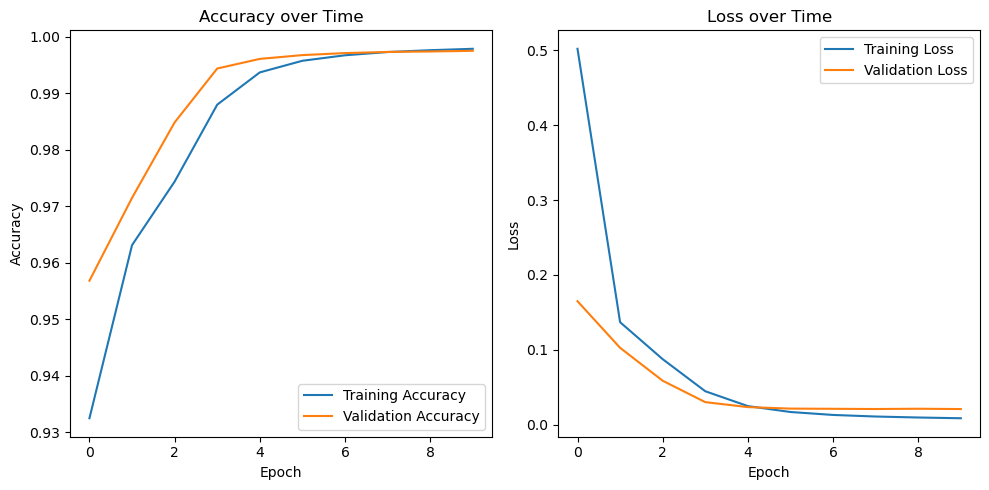

In [35]:
import matplotlib.pyplot as plt


# Plot accuracy over time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss over time
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Save the trained model
lstm_model.save("17b/lstm/")

INFO:tensorflow:Assets written to: 17b/lstm/assets


INFO:tensorflow:Assets written to: 17b/lstm/assets


In [37]:
from keras.models import load_model

# Load the trained model
loaded_lstm__model = load_model("17b/lstm")

In [38]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(sentences_test, pos_tags_test, verbose=1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

136/136 [==============================] - 11s 82ms/step - loss: 0.0216 - accuracy: 0.9974
Loss: 0.021568693220615387,
Accuracy: 0.9974158406257629


136/136 [==============================] - 10s 67ms/step


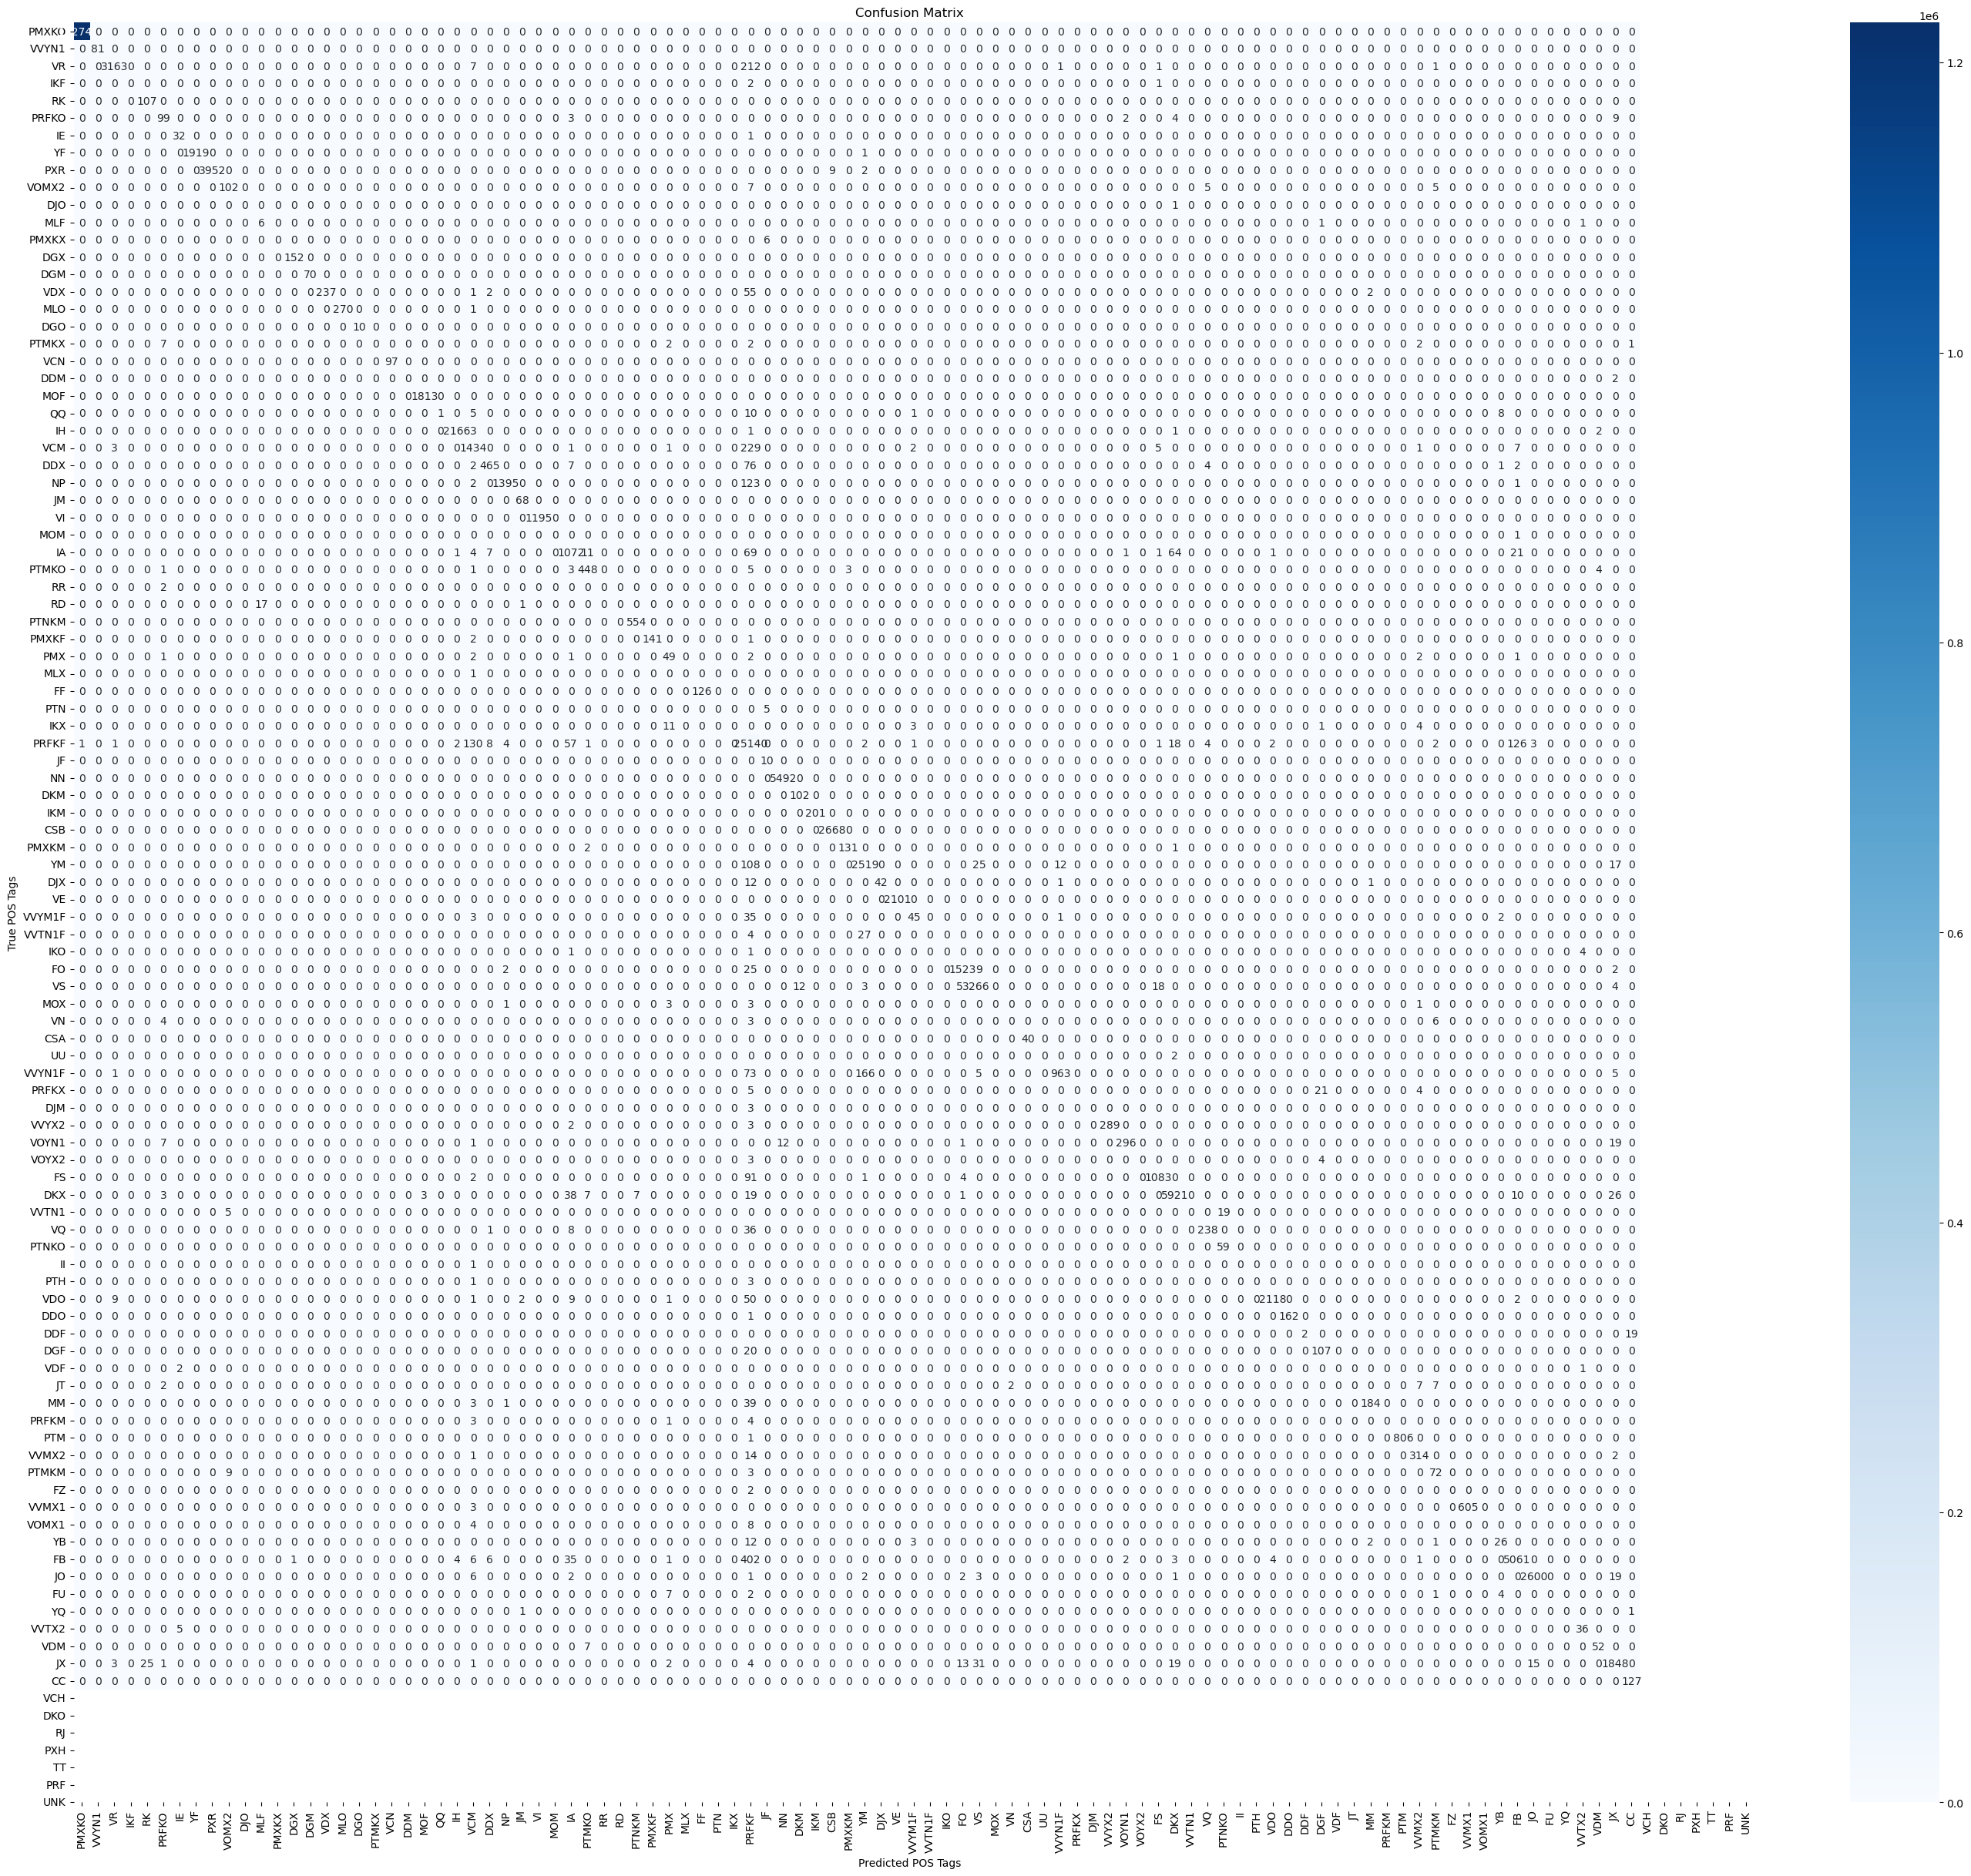

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict POS tags using the trained model
predicted_tags = lstm_model.predict(sentences_test)
predicted_tags = np.argmax(predicted_tags, axis=-1)

# Flatten the true and predicted tags arrays
true_tags_flat = np.ravel(pos_tags_test)
predicted_tags_flat = np.ravel(predicted_tags)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_tags_flat, predicted_tags_flat)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(35, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=idx_to_tag.values(), yticklabels=idx_to_tag.values())
plt.xlabel('Predicted POS Tags')
plt.ylabel('True POS Tags')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, and F1 score
precision = precision_score(true_tags_flat, predicted_tags_flat, average='weighted')
recall = recall_score(true_tags_flat, predicted_tags_flat, average='weighted')
f1 = f1_score(true_tags_flat, predicted_tags_flat, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(true_tags_flat, predicted_tags_flat)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9973
Recall: 0.9974
F1 Score: 0.9973
Accuracy: 0.9974


In [41]:
import numpy as np
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Take user input sentence
new_sentence = input("Enter a sentence: ")

# Tokenize the user input sentence
tokenized_new_sentence = word_tokenize(new_sentence.lower())

# Convert tokens to numerical indices using the tokenizer
new_sentence_indices = [tokenizer.word_index.get(word, 0) for word in tokenized_new_sentence]

# Pad the input sequence to match the model's input length
padded_new_sentence_indices = pad_sequences([new_sentence_indices], maxlen=max_sequence_length, padding='post', value=0)

# Predict POS tags for the input sentence
predicted_tag_indices = lstm_model.predict(padded_new_sentence_indices)

# Map the predicted indices back to POS tags using idx_to_tag
predicted_tags = [idx_to_tag[idx] for idx in np.argmax(predicted_tag_indices, axis=-1)[0]]

# Print the POS tagged sentence
pos_tagged_sentence = list(zip(tokenized_new_sentence, predicted_tags))
for word, pos_tag in pos_tagged_sentence:
    print(f'{word}: {pos_tag}')


Enter a sentence: नेपाल क्रिकेट संघ का नव निर्वाचित सचिव तथा राष्ट्रिय क्रिकेट टिम का पूर्वकप्तान पारस खड्का ले घरेलु क्रिकेट को संरचना बलियो बनाउने आफ्नो प्राथमिकता रहेको बताए का छन् । शनिबार भए को क्यान को निर्वाचन बाट सचिव मा विजयी भए पछि खड्का ले क्रिकेट को जिल्ला र प्रदेश संरचना बलियो बनाउने पहिलो प्राथमिकता रहे को बताए ।
1/1 [==============================] - 0s 47ms/step
नेपाल: RK
क्रिकेट: JM
संघ: NN
का: IKO
नव: JX
निर्वाचित: JX
सचिव: NN
तथा: CC
राष्ट्रिय: JX
क्रिकेट: NN
टिम: NN
का: IKO
पूर्वकप्तान: NN
पारस: NN
खड्का: NP
ले: IE
घरेलु: JX
क्रिकेट: NN
को: IKM
संरचना: NN
बलियो: JM
बनाउने: VN
आफ्नो: PRFKM
प्राथमिकता: NN
रहेको: NN
बताए: VVYX2
का: IKO
छन्: VVYX2
।: YF
शनिबार: NN
भए: VE
को: IKM
क्यान: NN
को: IKM
निर्वाचन: NN
बाट: II
सचिव: NN
मा: II
विजयी: JX
भए: VE
पछि: II
खड्का: NP
ले: IE
क्रिकेट: NN
को: IKM
जिल्ला: NN
र: CC
प्रदेश: NN
संरचना: NN
बलियो: JM
बनाउने: VN
पहिलो: MOM
प्राथमिकता: NN
रहे: VE
को: IKM
बताए: VVYX2
।: YF


# GRU

In [42]:
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout


vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  # Adjust as needed

# Step 3: Model Architecture
gru_model = Sequential()
gru_model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(Dropout(0.3))  # Adding a dropout layer with 30% dropout rate
gru_model.add(Dense(64, activation='relu'))  # Adding an additional dense layer
gru_model.add(Dense(64, activation='relu'))  # Adding an additional dense layer
gru_model.add(TimeDistributed(Dense(len(tag_to_idx), activation='softmax')))


gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 303, 100)          4043400   
                                                                 
 gru (GRU)                   (None, 303, 64)           31872     
                                                                 
 dropout_1 (Dropout)         (None, 303, 64)           0         
                                                                 
 dense_3 (Dense)             (None, 303, 64)           4160      
                                                                 
 dense_4 (Dense)             (None, 303, 64)           4160      
                                                                 
 time_distributed_1 (TimeDis  (None, 303, 103)         6695      
 tributed)                                                       
                                                      

In [43]:
from tensorflow.keras.optimizers import Adam

# Step 4: Training
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001 ), metrics=['accuracy'])

gru_history = gru_model.fit(sentences_train, pos_tags_train, epochs=10, batch_size=64, validation_data=(sentences_val, pos_tags_val), verbose=1)

Epoch 1/10
317/317 [==============================] - 151s 463ms/step - loss: 0.4716 - accuracy: 0.9415 - val_loss: 0.1460 - val_accuracy: 0.9598
Epoch 2/10
317/317 [==============================] - 144s 453ms/step - loss: 0.0765 - accuracy: 0.9796 - val_loss: 0.0320 - val_accuracy: 0.9926
Epoch 3/10
317/317 [==============================] - 146s 460ms/step - loss: 0.0223 - accuracy: 0.9945 - val_loss: 0.0193 - val_accuracy: 0.9955
Epoch 4/10
317/317 [==============================] - 147s 463ms/step - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.0165 - val_accuracy: 0.9963
Epoch 5/10
317/317 [==============================] - 144s 454ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0161 - val_accuracy: 0.9966
Epoch 6/10
317/317 [==============================] - 141s 443ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.0156 - val_accuracy: 0.9968
Epoch 7/10
317/317 [==============================] - 142s 448ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.0149 -

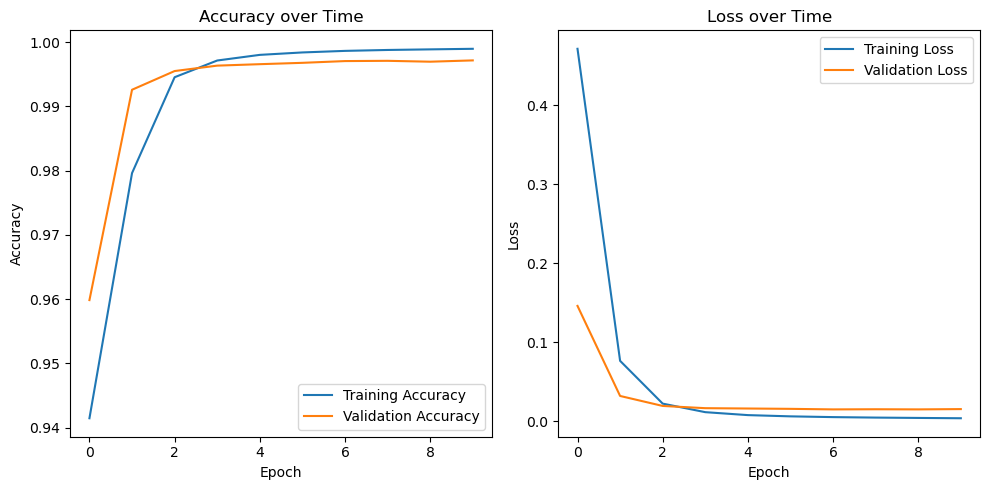

In [44]:
import matplotlib.pyplot as plt


# Plot accuracy over time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(gru_history.history['accuracy'], label='Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss over time
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
# Save the trained model
gru_model.save("17b/gru/")

INFO:tensorflow:Assets written to: 17b/gru/assets


INFO:tensorflow:Assets written to: 17b/gru/assets


In [46]:
from keras.models import load_model

# Load the trained model
loaded_gru_model = load_model("17b/gru/")

In [47]:
# Evaluate the model
loss, accuracy = gru_model.evaluate(sentences_test, pos_tags_test, verbose=1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

136/136 [==============================] - 10s 75ms/step - loss: 0.0155 - accuracy: 0.9970
Loss: 0.015472960658371449,
Accuracy: 0.9970076084136963


136/136 [==============================] - 9s 58ms/step


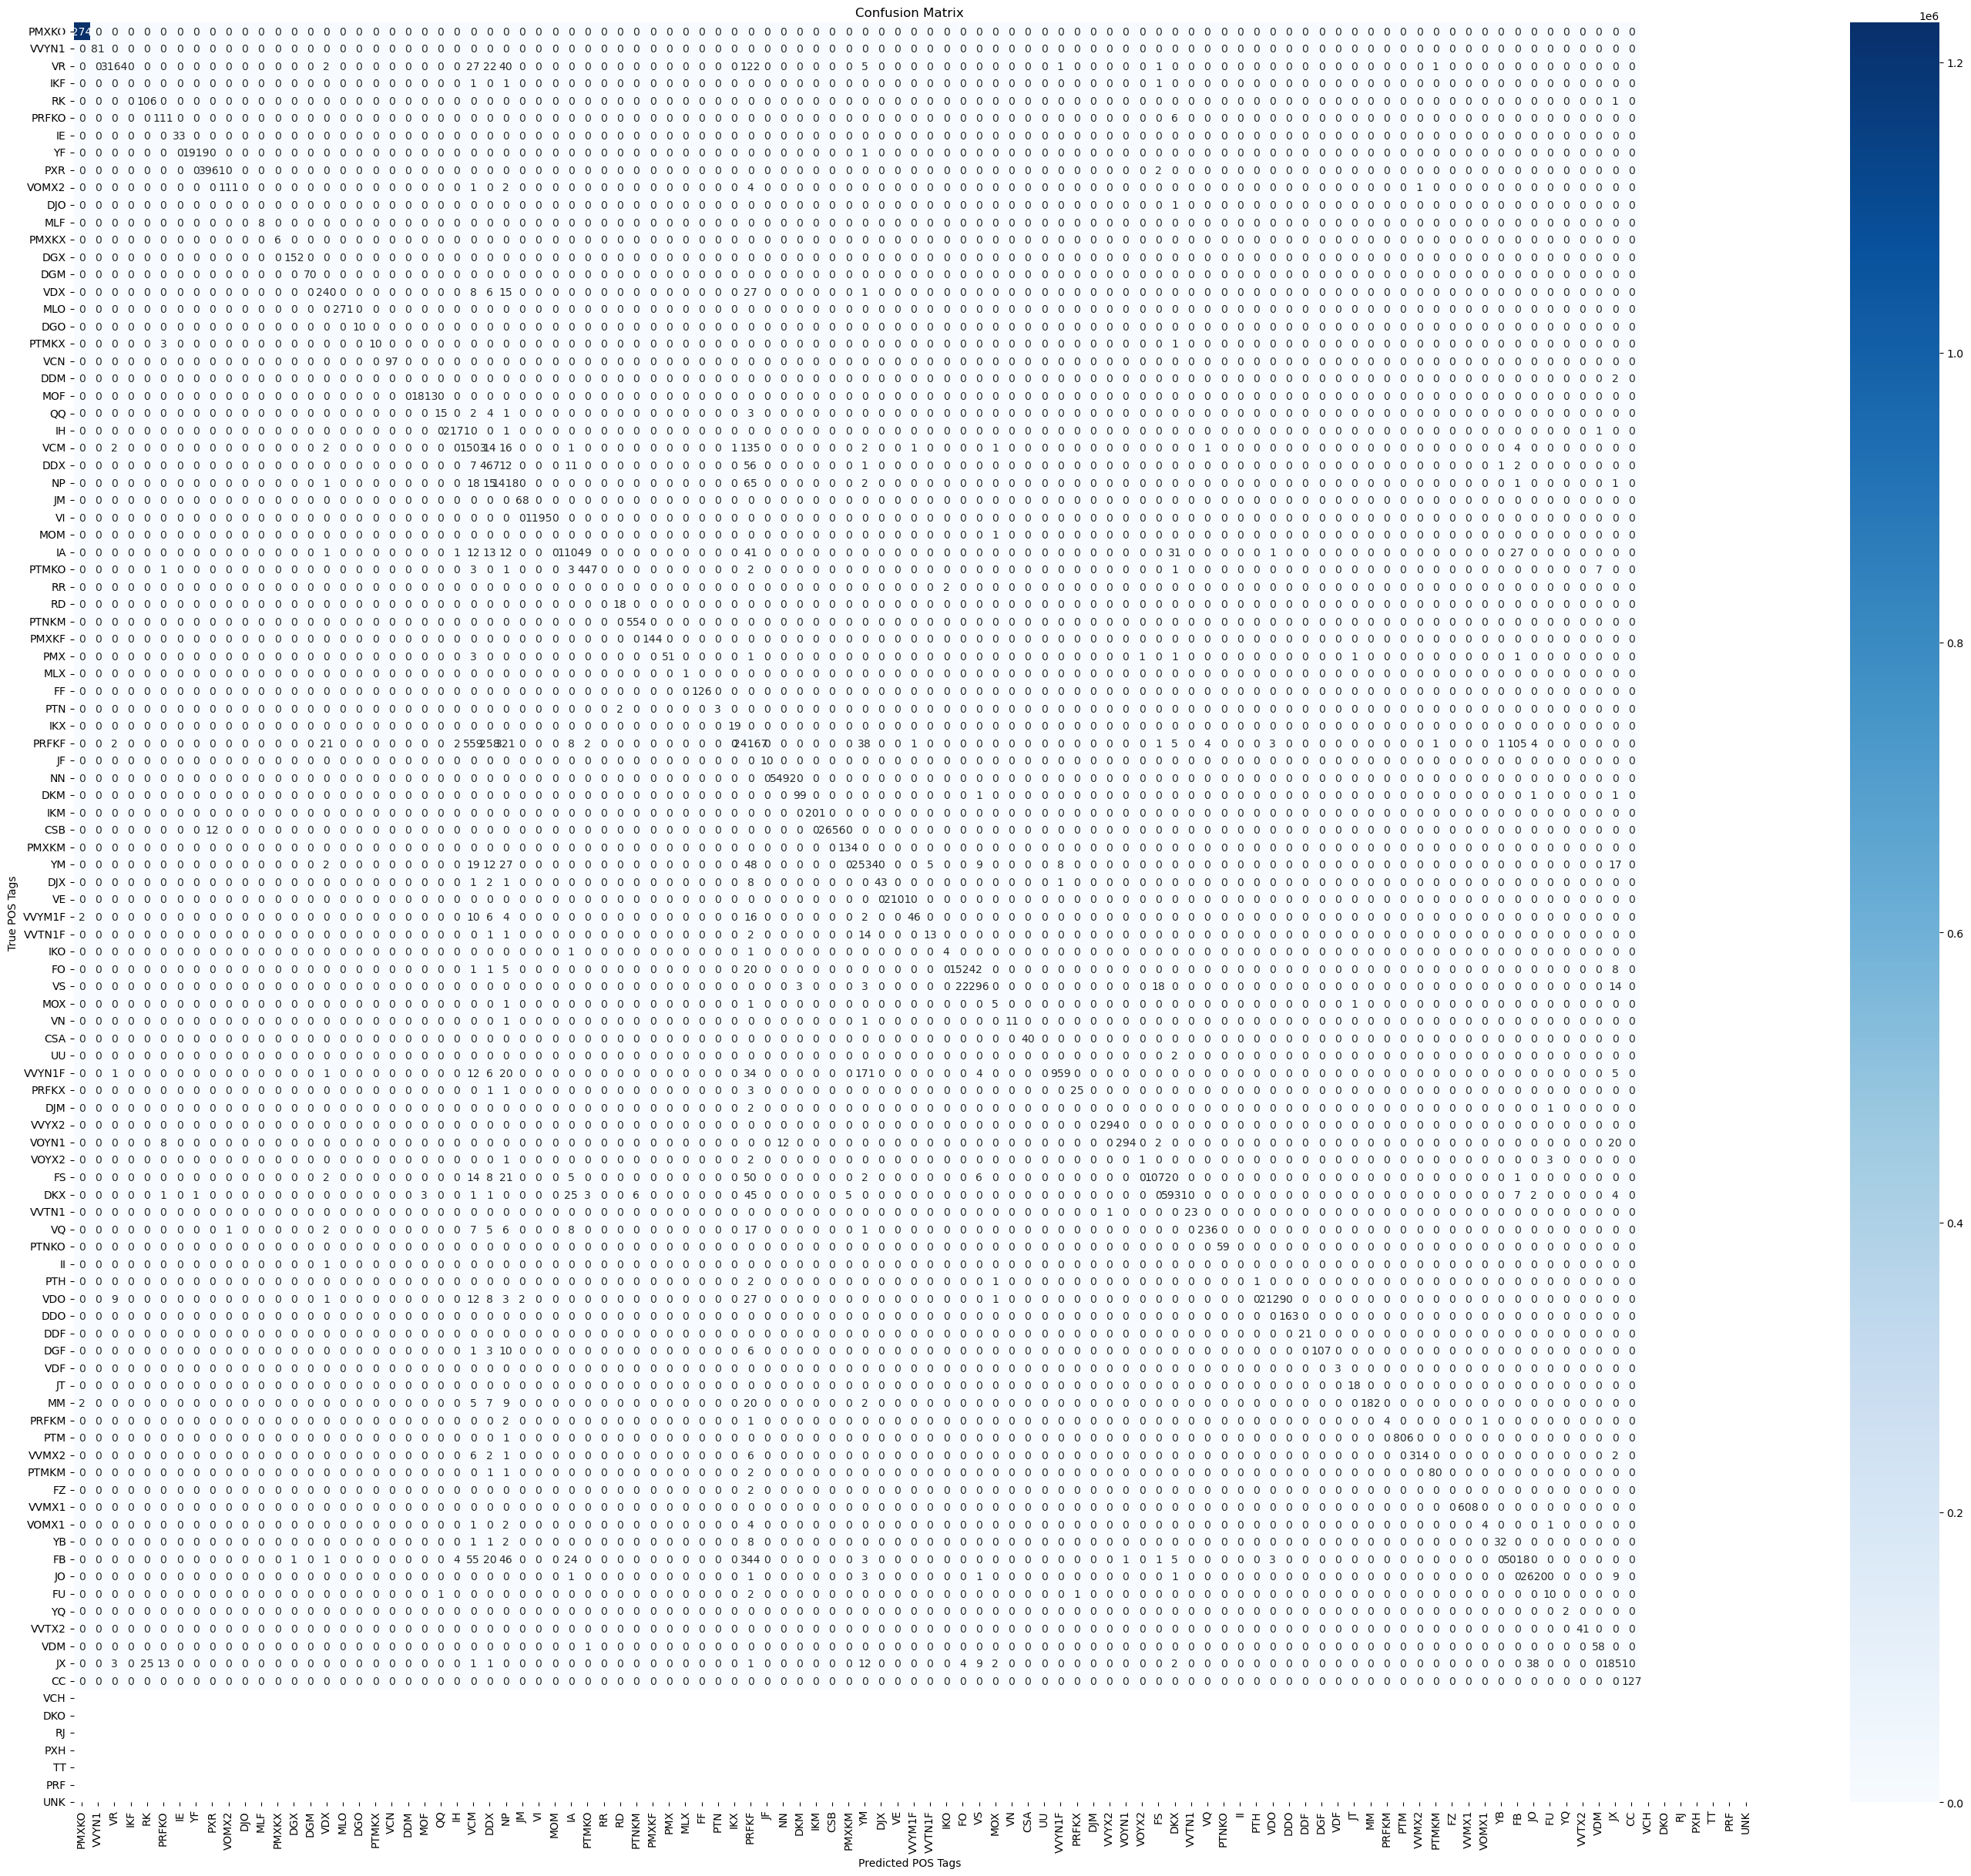

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict POS tags using the trained model
predicted_tags = gru_model.predict(sentences_test)
predicted_tags = np.argmax(predicted_tags, axis=-1)

# Flatten the true and predicted tags arrays
true_tags_flat = np.ravel(pos_tags_test)
predicted_tags_flat = np.ravel(predicted_tags)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_tags_flat, predicted_tags_flat)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(35, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=idx_to_tag.values(), yticklabels=idx_to_tag.values())
plt.xlabel('Predicted POS Tags')
plt.ylabel('True POS Tags')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, and F1 score
precision = precision_score(true_tags_flat, predicted_tags_flat, average='weighted')
recall = recall_score(true_tags_flat, predicted_tags_flat, average='weighted')
f1 = f1_score(true_tags_flat, predicted_tags_flat, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(true_tags_flat, predicted_tags_flat)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9974
Recall: 0.9970
F1 Score: 0.9971
Accuracy: 0.9970


In [50]:
import numpy as np
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Take user input sentence
new_sentence = input("Enter a sentence: ")

# Tokenize the user input sentence
tokenized_new_sentence = word_tokenize(new_sentence.lower())

# Convert tokens to numerical indices using the tokenizer
new_sentence_indices = [tokenizer.word_index.get(word, 0) for word in tokenized_new_sentence]

# Pad the input sequence to match the model's input length
padded_new_sentence_indices = pad_sequences([new_sentence_indices], maxlen=max_sequence_length, padding='post', value=0)

# Predict POS tags for the input sentence
predicted_tag_indices = gru_model.predict(padded_new_sentence_indices)

# Map the predicted indices back to POS tags using idx_to_tag
predicted_tags = [idx_to_tag[idx] for idx in np.argmax(predicted_tag_indices, axis=-1)[0]]

# Print the POS tagged sentence
pos_tagged_sentence = list(zip(tokenized_new_sentence, predicted_tags))
for word, pos_tag in pos_tagged_sentence:
    print(f'{word}: {pos_tag}')

Enter a sentence: नेपाल क्रिकेट संघ का नव निर्वाचित सचिव तथा राष्ट्रिय क्रिकेट टिम का पूर्वकप्तान पारस खड्का ले घरेलु क्रिकेट को संरचना बलियो बनाउने आफ्नो प्राथमिकता रहेको बताए का छन् । शनिबार भए को क्यान को निर्वाचन बाट सचिव मा विजयी भए पछि खड्का ले क्रिकेट को जिल्ला र प्रदेश संरचना बलियो बनाउने पहिलो प्राथमिकता रहे को बताए ।
1/1 [==============================] - 0s 38ms/step
नेपाल: NP
क्रिकेट: NN
संघ: NN
का: IKO
नव: JX
निर्वाचित: JX
सचिव: NN
तथा: CC
राष्ट्रिय: JX
क्रिकेट: NN
टिम: NN
का: IKO
पूर्वकप्तान: UNK
पारस: NN
खड्का: NP
ले: IE
घरेलु: JX
क्रिकेट: NN
को: IKM
संरचना: NN
बलियो: JM
बनाउने: VN
आफ्नो: PRFKM
प्राथमिकता: NN
रहेको: VE
बताए: VE
का: IKO
छन्: VVYX2
।: YF
शनिबार: NN
भए: VE
को: IKM
क्यान: NN
को: IKM
निर्वाचन: NN
बाट: II
सचिव: NN
मा: II
विजयी: JX
भए: VE
पछि: II
खड्का: NP
ले: IE
क्रिकेट: NN
को: IKM
जिल्ला: NN
र: CC
प्रदेश: NN
संरचना: NN
बलियो: JM
बनाउने: VN
पहिलो: MOM
प्राथमिकता: NN
रहे: VE
को: IKM
बताए: VE
।: YF


# BiLSTM

In [51]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout


vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  # Adjust as needed

# Step 3: Model Architecture
bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(Dropout(0.3))  # Adding a dropout layer with 30% dropout rate
bilstm_model.add(Dense(64, activation='relu'))  # Adding an additional dense layer
bilstm_model.add(Dense(64, activation='relu'))  # Adding an additional dense layer
bilstm_model.add(TimeDistributed(Dense(len(tag_to_idx), activation='softmax')))


bilstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 303, 100)          4043400   
                                                                 
 bidirectional (Bidirectiona  (None, 303, 128)         84480     
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 303, 128)          0         
                                                                 
 dense_6 (Dense)             (None, 303, 64)           8256      
                                                                 
 dense_7 (Dense)             (None, 303, 64)           4160      
                                                                 
 time_distributed_2 (TimeDis  (None, 303, 103)         6695      
 tributed)                                            

In [52]:
from tensorflow.keras.optimizers import Adam

# Step 4: Training
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001 ), metrics=['accuracy'])

bilstm_history = bilstm_model.fit(sentences_train, pos_tags_train, epochs=10, batch_size=64, validation_data=(sentences_val, pos_tags_val), verbose=1)

Epoch 1/10
317/317 [==============================] - 297s 923ms/step - loss: 0.3884 - accuracy: 0.9467 - val_loss: 0.1409 - val_accuracy: 0.9626
Epoch 2/10
317/317 [==============================] - 272s 859ms/step - loss: 0.1018 - accuracy: 0.9720 - val_loss: 0.0512 - val_accuracy: 0.9871
Epoch 3/10
317/317 [==============================] - 267s 844ms/step - loss: 0.0367 - accuracy: 0.9907 - val_loss: 0.0225 - val_accuracy: 0.9952
Epoch 4/10
317/317 [==============================] - 274s 864ms/step - loss: 0.0177 - accuracy: 0.9957 - val_loss: 0.0181 - val_accuracy: 0.9966
Epoch 5/10
317/317 [==============================] - 276s 869ms/step - loss: 0.0115 - accuracy: 0.9973 - val_loss: 0.0172 - val_accuracy: 0.9971
Epoch 6/10
317/317 [==============================] - 270s 853ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.0170 - val_accuracy: 0.9973
Epoch 7/10
317/317 [==============================] - 275s 868ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0163 -

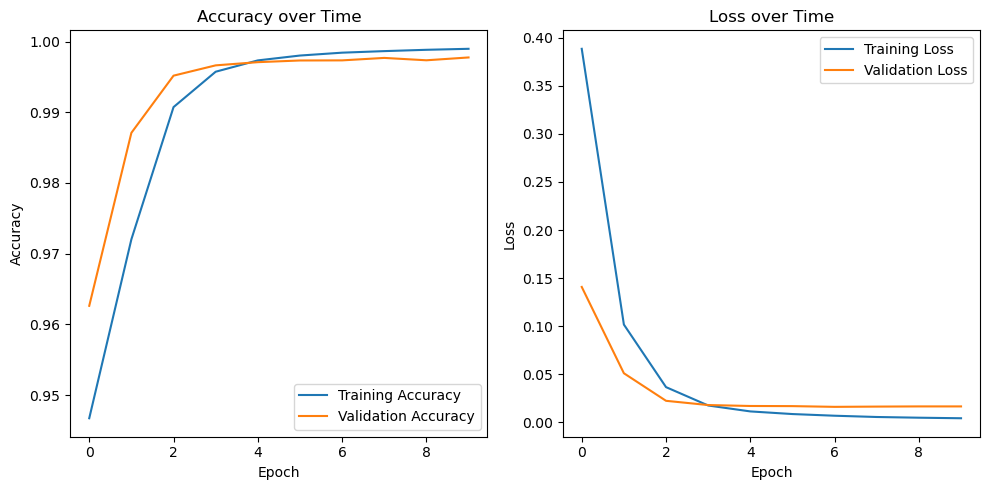

In [53]:
import matplotlib.pyplot as plt


# Plot accuracy over time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(bilstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss over time
plt.subplot(1, 2, 2)
plt.plot(bilstm_history.history['loss'], label='Training Loss')
plt.plot(bilstm_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
# Save the trained model
bilstm_model.save("17b/bilstm/")

INFO:tensorflow:Assets written to: 17b/bilstm/assets


INFO:tensorflow:Assets written to: 17b/bilstm/assets


In [55]:
from keras.models import load_model

# Load the trained model
loaded_bilstm_model = load_model("17b/bilstm/")

In [56]:
# Evaluate the model
loss, accuracy = bilstm_model.evaluate(sentences_test, pos_tags_test, verbose=1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

136/136 [==============================] - 18s 129ms/step - loss: 0.0173 - accuracy: 0.9976
Loss: 0.01726655662059784,
Accuracy: 0.9976036548614502


136/136 [==============================] - 18s 122ms/step


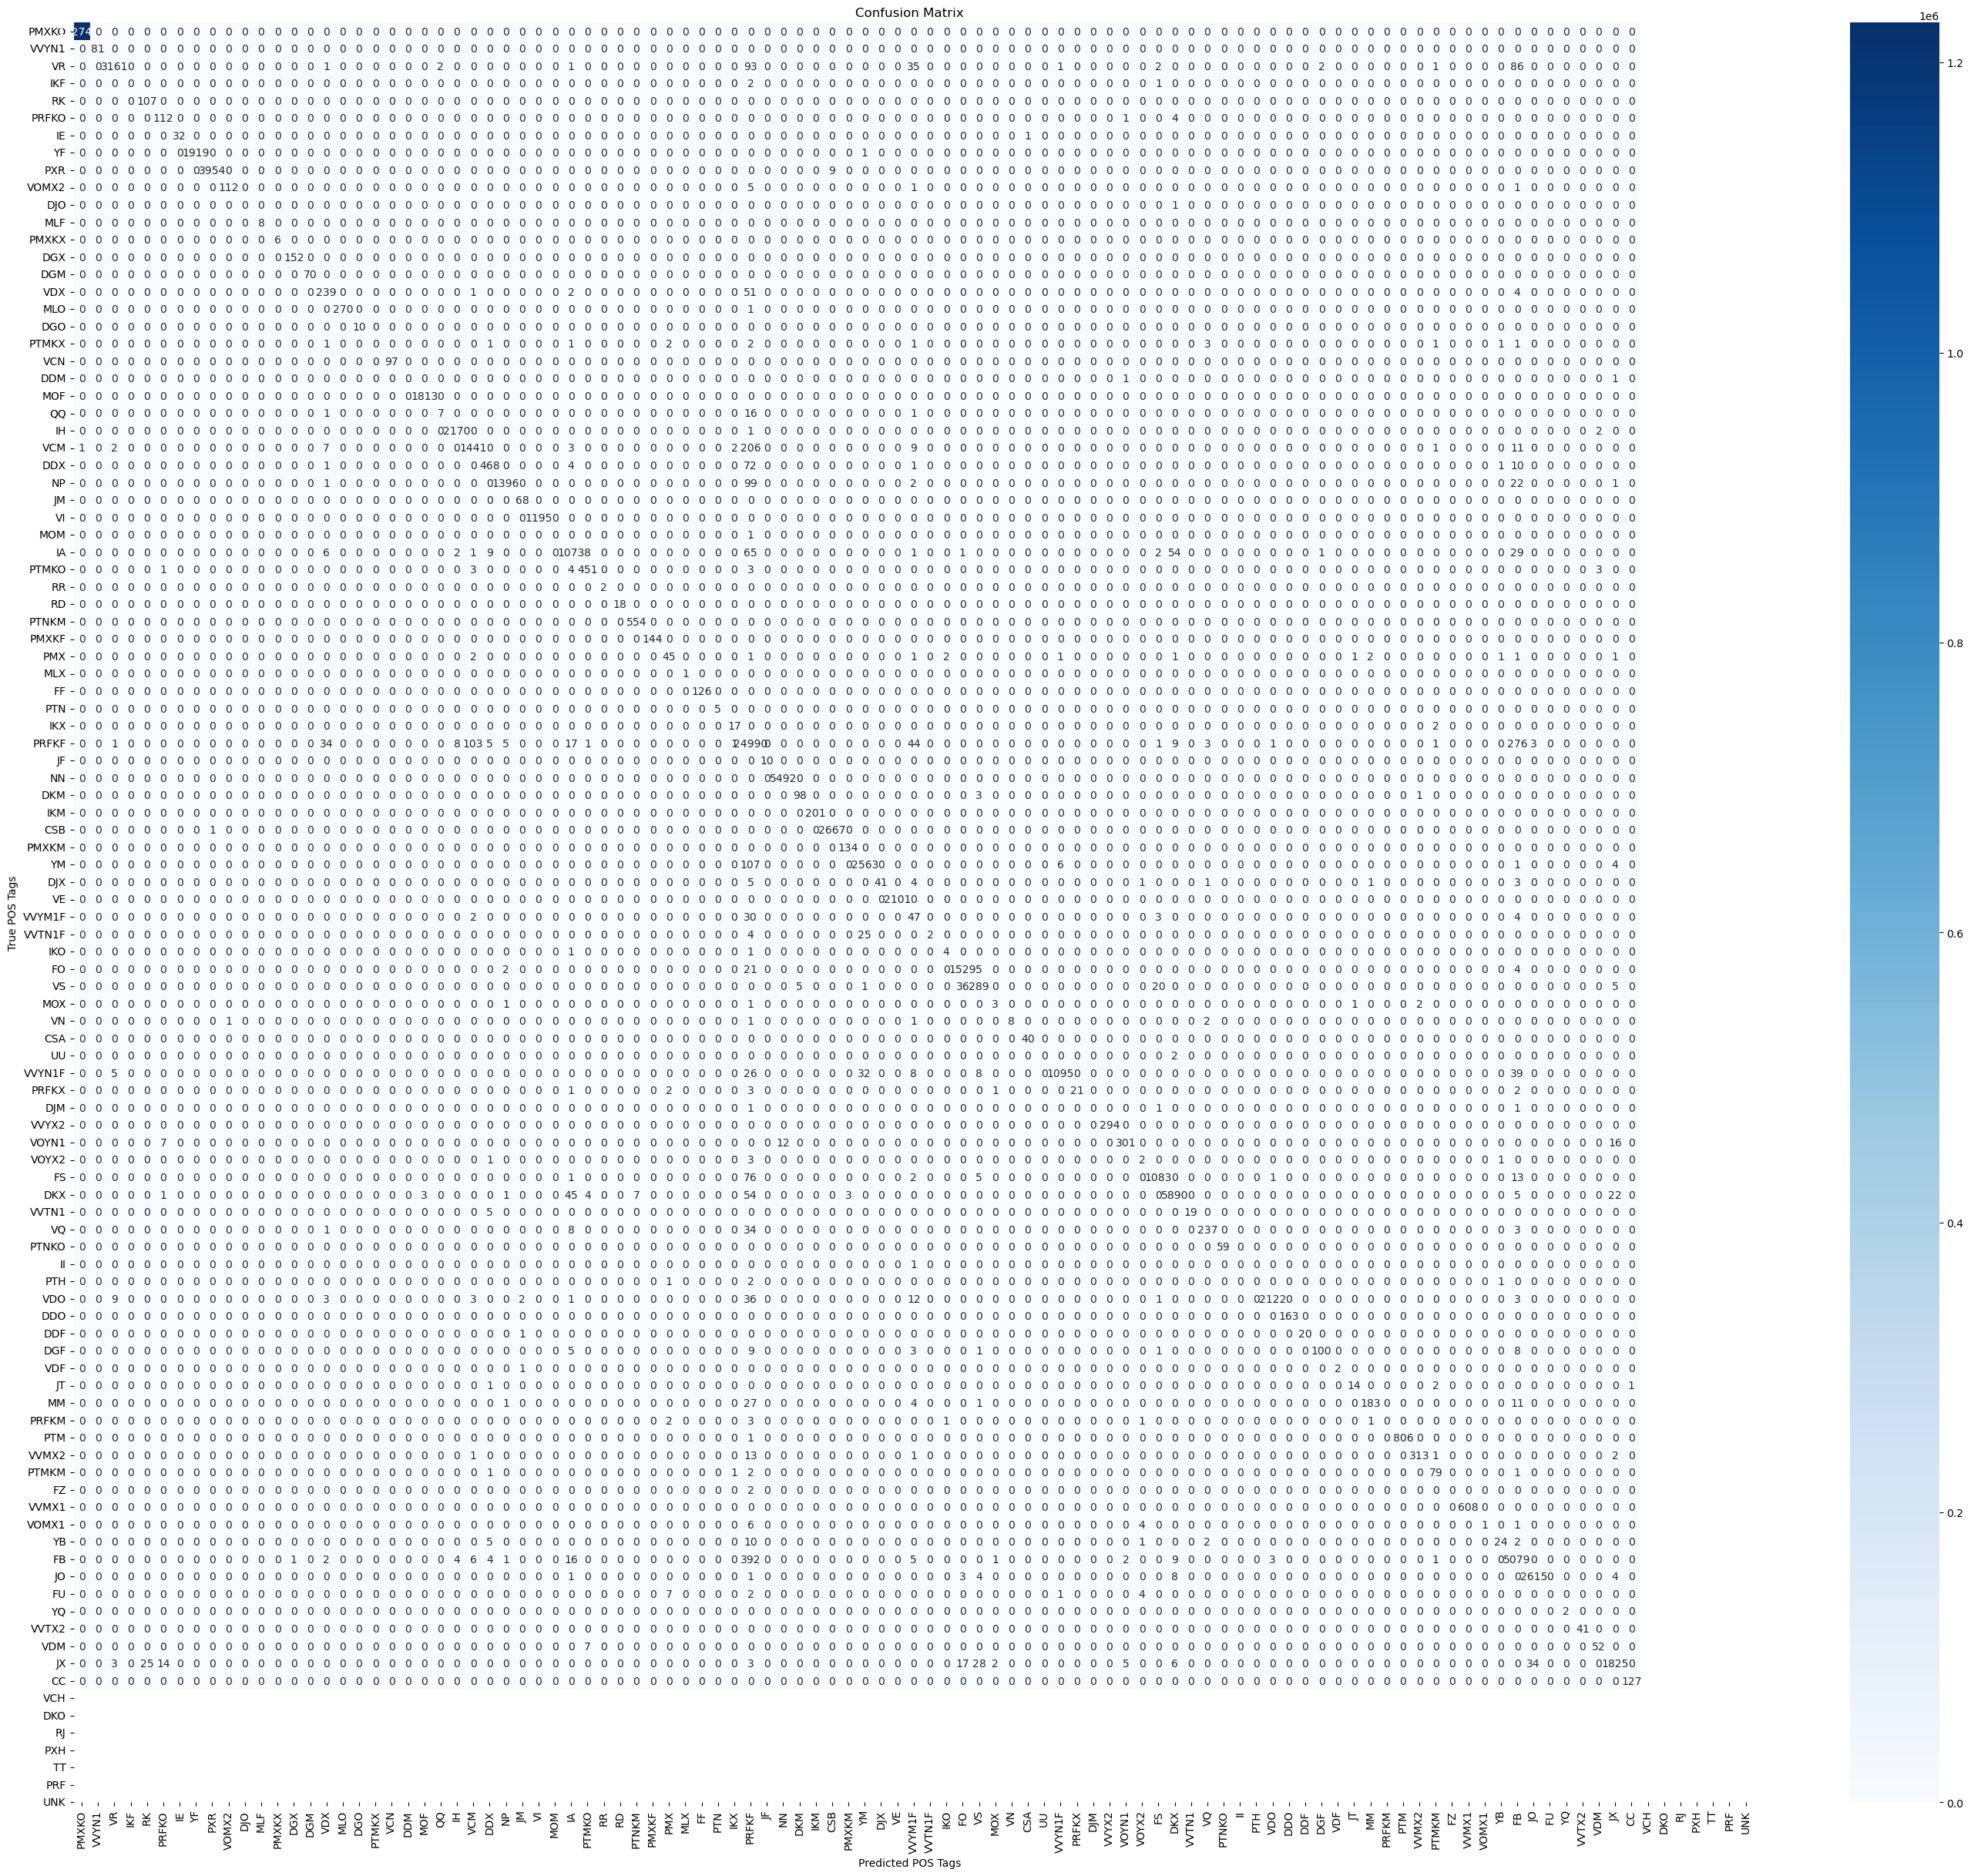

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict POS tags using the trained model
predicted_tags = bilstm_model.predict(sentences_test)
predicted_tags = np.argmax(predicted_tags, axis=-1)

# Flatten the true and predicted tags arrays
true_tags_flat = np.ravel(pos_tags_test)
predicted_tags_flat = np.ravel(predicted_tags)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_tags_flat, predicted_tags_flat)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(35, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=idx_to_tag.values(), yticklabels=idx_to_tag.values())
plt.xlabel('Predicted POS Tags')
plt.ylabel('True POS Tags')
plt.title('Confusion Matrix')
plt.show()

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, and F1 score
precision = precision_score(true_tags_flat, predicted_tags_flat, average='weighted')
recall = recall_score(true_tags_flat, predicted_tags_flat, average='weighted')
f1 = f1_score(true_tags_flat, predicted_tags_flat, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(true_tags_flat, predicted_tags_flat)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9976
Recall: 0.9976
F1 Score: 0.9976
Accuracy: 0.9976


In [59]:
import numpy as np
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Take user input sentence
new_sentence = input("Enter a sentence: ")

# Tokenize the user input sentence
tokenized_new_sentence = word_tokenize(new_sentence.lower())

# Convert tokens to numerical indices using the tokenizer
new_sentence_indices = [tokenizer.word_index.get(word, 0) for word in tokenized_new_sentence]

# Pad the input sequence to match the model's input length
padded_new_sentence_indices = pad_sequences([new_sentence_indices], maxlen=max_sequence_length, padding='post', value=0)

# Predict POS tags for the input sentence
predicted_tag_indices = bilstm_model.predict(padded_new_sentence_indices)

# Map the predicted indices back to POS tags using idx_to_tag
predicted_tags = [idx_to_tag[idx] for idx in np.argmax(predicted_tag_indices, axis=-1)[0]]

# Print the POS tagged sentence
pos_tagged_sentence = list(zip(tokenized_new_sentence, predicted_tags))
for word, pos_tag in pos_tagged_sentence:
    print(f'{word}: {pos_tag}')

Enter a sentence: नेपाल क्रिकेट संघ का नव निर्वाचित सचिव तथा राष्ट्रिय क्रिकेट टिम का पूर्वकप्तान पारस खड्का ले घरेलु क्रिकेट को संरचना बलियो बनाउने आफ्नो प्राथमिकता रहेको बताए का छन् । शनिबार भए को क्यान को निर्वाचन बाट सचिव मा विजयी भए पछि खड्का ले क्रिकेट को जिल्ला र प्रदेश संरचना बलियो बनाउने पहिलो प्राथमिकता रहे को बताए ।
1/1 [==============================] - 0s 31ms/step
नेपाल: RD
क्रिकेट: NN
संघ: NN
का: IKO
नव: VI
निर्वाचित: VI
सचिव: NN
तथा: CC
राष्ट्रिय: VI
क्रिकेट: NN
टिम: NN
का: IKO
पूर्वकप्तान: RD
पारस: JM
खड्का: RD
ले: IE
घरेलु: VI
क्रिकेट: NN
को: IKM
संरचना: NN
बलियो: PRF
बनाउने: IKO
आफ्नो: PRFKM
प्राथमिकता: DDX
रहेको: RD
बताए: VE
का: IKO
छन्: YF
।: YF
शनिबार: NN
भए: II
को: IKM
क्यान: NN
को: IKM
निर्वाचन: NN
बाट: II
सचिव: NN
मा: II
विजयी: NN
भए: NN
पछि: PMXKO
खड्का: IKX
ले: FS
क्रिकेट: DKM
को: YQ
जिल्ला: UNK
र: UNK
प्रदेश: UNK
संरचना: UNK
बलियो: UNK
बनाउने: UNK
पहिलो: UNK
प्राथमिकता: UNK
रहे: UNK
को: UNK
बताए: UNK
।: UNK


# loading the saved json files, trained models and their use

In [60]:
# import dependencies
import os
import xml.etree.ElementTree as ET
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Update this line
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Dropout  # Update this line

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Retrieve the JSON data from the word_to_index.json file and store it in the word_to_index variable

In [61]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [62]:
import json

filename = '17b/tokenizer.word_index.json'

# Load the dictionary from the JSON file
with open(filename, 'r', encoding='utf-8') as file:
    tokenizer.word_index = json.load(file)

# Now you can use the word_to_idx dictionary
print(tokenizer.word_index)

{'को': 1, '।': 2, 'मा': 3, 'का': 4, ',': 5, 'ले': 6, 'र': 7, 'हरू': 8, 'लाई': 9, 'पनि': 10, 'छ': 11, 'भए': 12, 'बाट': 13, "'": 14, '(': 15, ')': 16, '–': 17, 'थियो': 18, 'गर्ने': 19, 'यस': 20, 'हरु': 21, 'यो': 22, 'तर': 23, 'नै': 24, 'हो': 25, 'पछि': 26, 'गरे': 27, 'छन्': 28, 'भने': 29, 'गर्न': 30, 'म': 31, 'भन्ने': 32, 'नेपाल': 33, 'त्यस': 34, 'उनी': 35, 'लागि': 36, 'तथा': 37, 'कुरा': 38, 'त': 39, 'सम्म': 40, 'एक': 41, 'हामी': 42, 'स्वास्थ्य': 43, 'मात्र': 44, 'एउ': 45, 'सँग': 46, '“': 47, '”': 48, 'टा': 49, 'सबै': 50, 'केही': 51, 'काम': 52, '?': 53, 'आफ्नो': 54, 'रूप': 55, 'हुने': 56, 'वा': 57, 'थिए': 58, 'छैन': 59, 'हुन्छ': 60, 'घर': 61, 'कै': 62, 'त्यो': 63, 'शिक्षा': 64, 'जना': 65, 'वर्ष': 66, 'कुनै': 67, 'नेपाली': 68, 'क्षेत्र': 69, 'मेरो': 70, 'हुन': 71, 'उन': 72, 'गरी': 73, 'माथि': 74, 'रहे': 75, 'धेरै': 76, 'देखि': 77, 'के': 78, 'दिन': 79, 'सरकार': 80, 'माओवादी': 81, 'तिर': 82, 'की': 83, 'आए': 84, 'गरिए': 85, 'दुई': 86, 'मानिस': 87, 'मै': 88, 'यी': 89, 'कारण': 90, 'महिला': 91,

In [63]:
import json

filename = '17b/idx_to_tag.json'

# Load the dictionary from the JSON file
with open(filename, 'r', encoding='utf-8') as file:
    idx_to_tag = json.load(file)

# Now you can use the idx_to_tag dictionary
print(idx_to_tag)

{'1': 'PMXKO', '2': 'VVYN1', '3': 'VR', '4': 'IKF', '5': 'RK', '6': 'PRFKO', '7': 'IE', '8': 'YF', '9': 'PXR', '10': 'VOMX2', '11': 'DJO', '12': 'MLF', '13': 'PMXKX', '14': 'DGX', '15': 'DGM', '16': 'VDX', '17': 'MLO', '18': 'DGO', '19': 'PTMKX', '20': 'VCN', '21': 'DDM', '22': 'MOF', '23': 'QQ', '24': 'IH', '25': 'VCM', '26': 'DDX', '27': 'NP', '28': 'JM', '29': 'VI', '30': 'MOM', '31': 'IA', '32': 'PTMKO', '33': 'RR', '34': 'RD', '35': 'PTNKM', '36': 'PMXKF', '37': 'PMX', '38': 'MLX', '39': 'FF', '40': 'PTN', '41': 'IKX', '42': 'PRFKF', '43': 'JF', '44': 'NN', '45': 'DKM', '46': 'IKM', '47': 'CSB', '48': 'PMXKM', '49': 'YM', '50': 'DJX', '51': 'VE', '52': 'VVYM1F', '53': 'VVTN1F', '54': 'IKO', '55': 'FO', '56': 'VS', '57': 'MOX', '58': 'VN', '59': 'CSA', '60': 'UU', '61': 'VVYN1F', '62': 'PRFKX', '63': 'DJM', '64': 'VVYX2', '65': 'VOYN1', '66': 'VOYX2', '67': 'FS', '68': 'DKX', '69': 'VVTN1', '70': 'VQ', '71': 'PTNKO', '72': 'II', '73': 'PTH', '74': 'VDO', '75': 'DDO', '76': 'DDF', '

### Retrieve saved models and user input

In [64]:
max_sequence_length = 303

#### LSTM

In [65]:
from keras.models import load_model

# Load the trained model
loaded_lstm__model = load_model("17b/lstm/")

In [66]:
import numpy as np
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Take user input sentence
new_sentence = input("Enter a sentence: ")

# Tokenize the user input sentence
tokenized_new_sentence = word_tokenize(new_sentence.lower())

# Convert tokens to numerical indices using the tokenizer
new_sentence_indices = [tokenizer.word_index.get(word, 0) for word in tokenized_new_sentence]

# Pad the input sequence to match the model's input length
padded_new_sentence_indices = pad_sequences([new_sentence_indices], maxlen=max_sequence_length, padding='post', value=0)

# Predict POS tags for the input sentence
predicted_tag_indices = loaded_lstm__model.predict(padded_new_sentence_indices)

# Map the predicted indices back to POS tags using idx_to_tag
predicted_tags = [idx_to_tag[str(idx)] for idx in np.argmax(predicted_tag_indices, axis=-1)[0]]

# Print the POS tagged sentence
pos_tagged_sentence = list(zip(tokenized_new_sentence, predicted_tags))
for word, pos_tag in pos_tagged_sentence:
    print(f'{word}: {pos_tag}')

Enter a sentence: नेपाल क्रिकेट संघ का नव निर्वाचित सचिव तथा राष्ट्रिय क्रिकेट टिम का पूर्वकप्तान पारस खड्का ले घरेलु क्रिकेट को संरचना बलियो बनाउने आफ्नो प्राथमिकता रहेको बताए का छन् । शनिबार भए को क्यान को निर्वाचन बाट सचिव मा विजयी भए पछि खड्का ले क्रिकेट को जिल्ला र प्रदेश संरचना बलियो बनाउने पहिलो प्राथमिकता रहे को बताए ।
1/1 [==============================] - 0s 491ms/step
नेपाल: RK
क्रिकेट: JM
संघ: NN
का: IKO
नव: JX
निर्वाचित: JX
सचिव: NN
तथा: CC
राष्ट्रिय: JX
क्रिकेट: NN
टिम: NN
का: IKO
पूर्वकप्तान: NN
पारस: NN
खड्का: NP
ले: IE
घरेलु: JX
क्रिकेट: NN
को: IKM
संरचना: NN
बलियो: JM
बनाउने: VN
आफ्नो: PRFKM
प्राथमिकता: NN
रहेको: NN
बताए: VVYX2
का: IKO
छन्: VVYX2
।: YF
शनिबार: NN
भए: VE
को: IKM
क्यान: NN
को: IKM
निर्वाचन: NN
बाट: II
सचिव: NN
मा: II
विजयी: JX
भए: VE
पछि: II
खड्का: NP
ले: IE
क्रिकेट: NN
को: IKM
जिल्ला: NN
र: CC
प्रदेश: NN
संरचना: NN
बलियो: JM
बनाउने: VN
पहिलो: MOM
प्राथमिकता: NN
रहे: VE
को: IKM
बताए: VVYX2
।: YF


#### BiLSTM

In [67]:
from keras.models import load_model

# Load the trained model
loaded_bilstm_model = load_model("17b/bilstm/")

In [68]:
import numpy as np
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Take user input sentence
new_sentence = input("Enter a sentence: ")

# Tokenize the user input sentence
tokenized_new_sentence = word_tokenize(new_sentence.lower())

# Convert tokens to numerical indices using the tokenizer
new_sentence_indices = [tokenizer.word_index.get(word, 0) for word in tokenized_new_sentence]

# Pad the input sequence to match the model's input length
padded_new_sentence_indices = pad_sequences([new_sentence_indices], maxlen=max_sequence_length, padding='post', value=0)

# Predict POS tags for the input sentence
predicted_tag_indices = loaded_bilstm_model.predict(padded_new_sentence_indices)

# Map the predicted indices back to POS tags using idx_to_tag
predicted_tags = [idx_to_tag[str(idx)] for idx in np.argmax(predicted_tag_indices, axis=-1)[0]]

# Print the POS tagged sentence
pos_tagged_sentence = list(zip(tokenized_new_sentence, predicted_tags))
for word, pos_tag in pos_tagged_sentence:
    print(f'{word}: {pos_tag}')

Enter a sentence: नेपाल क्रिकेट संघ का नव निर्वाचित सचिव तथा राष्ट्रिय क्रिकेट टिम का पूर्वकप्तान पारस खड्का ले घरेलु क्रिकेट को संरचना बलियो बनाउने आफ्नो प्राथमिकता रहेको बताए का छन् । शनिबार भए को क्यान को निर्वाचन बाट सचिव मा विजयी भए पछि खड्का ले क्रिकेट को जिल्ला र प्रदेश संरचना बलियो बनाउने पहिलो प्राथमिकता रहे को बताए ।
1/1 [==============================] - 1s 1s/step
नेपाल: RD
क्रिकेट: NN
संघ: NN
का: IKO
नव: VI
निर्वाचित: VI
सचिव: NN
तथा: CC
राष्ट्रिय: VI
क्रिकेट: NN
टिम: NN
का: IKO
पूर्वकप्तान: RD
पारस: JM
खड्का: RD
ले: IE
घरेलु: VI
क्रिकेट: NN
को: IKM
संरचना: NN
बलियो: PRF
बनाउने: IKO
आफ्नो: PRFKM
प्राथमिकता: DDX
रहेको: RD
बताए: VE
का: IKO
छन्: YF
।: YF
शनिबार: NN
भए: II
को: IKM
क्यान: NN
को: IKM
निर्वाचन: NN
बाट: II
सचिव: NN
मा: II
विजयी: NN
भए: NN
पछि: PMXKO
खड्का: IKX
ले: FS
क्रिकेट: DKM
को: YQ
जिल्ला: UNK
र: UNK
प्रदेश: UNK
संरचना: UNK
बलियो: UNK
बनाउने: UNK
पहिलो: UNK
प्राथमिकता: UNK
रहे: UNK
को: UNK
बताए: UNK
।: UNK


#### GRU

In [69]:
from keras.models import load_model

# Load the trained model
loaded_gru_model = load_model("17b/gru/")

In [70]:
import numpy as np
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Take user input sentence
new_sentence = input("Enter a sentence: ")

# Tokenize the user input sentence
tokenized_new_sentence = word_tokenize(new_sentence.lower())

# Convert tokens to numerical indices using the tokenizer
new_sentence_indices = [tokenizer.word_index.get(word, 0) for word in tokenized_new_sentence]

# Pad the input sequence to match the model's input length
padded_new_sentence_indices = pad_sequences([new_sentence_indices], maxlen=max_sequence_length, padding='post', value=0)

# Predict POS tags for the input sentence
predicted_tag_indices = loaded_gru_model.predict(padded_new_sentence_indices)

# Map the predicted indices back to POS tags using idx_to_tag
predicted_tags = [idx_to_tag[str(idx)] for idx in np.argmax(predicted_tag_indices, axis=-1)[0]]

# Print the POS tagged sentence
pos_tagged_sentence = list(zip(tokenized_new_sentence, predicted_tags))
for word, pos_tag in pos_tagged_sentence:
    print(f'{word}: {pos_tag}')

Enter a sentence: नेपाल क्रिकेट संघ का नव निर्वाचित सचिव तथा राष्ट्रिय क्रिकेट टिम का पूर्वकप्तान पारस खड्का ले घरेलु क्रिकेट को संरचना बलियो बनाउने आफ्नो प्राथमिकता रहेको बताए का छन् । शनिबार भए को क्यान को निर्वाचन बाट सचिव मा विजयी भए पछि खड्का ले क्रिकेट को जिल्ला र प्रदेश संरचना बलियो बनाउने पहिलो प्राथमिकता रहे को बताए ।
1/1 [==============================] - 0s 447ms/step
नेपाल: NP
क्रिकेट: NN
संघ: NN
का: IKO
नव: JX
निर्वाचित: JX
सचिव: NN
तथा: CC
राष्ट्रिय: JX
क्रिकेट: NN
टिम: NN
का: IKO
पूर्वकप्तान: UNK
पारस: NN
खड्का: NP
ले: IE
घरेलु: JX
क्रिकेट: NN
को: IKM
संरचना: NN
बलियो: JM
बनाउने: VN
आफ्नो: PRFKM
प्राथमिकता: NN
रहेको: VE
बताए: VE
का: IKO
छन्: VVYX2
।: YF
शनिबार: NN
भए: VE
को: IKM
क्यान: NN
को: IKM
निर्वाचन: NN
बाट: II
सचिव: NN
मा: II
विजयी: JX
भए: VE
पछि: II
खड्का: NP
ले: IE
क्रिकेट: NN
को: IKM
जिल्ला: NN
र: CC
प्रदेश: NN
संरचना: NN
बलियो: JM
बनाउने: VN
पहिलो: MOM
प्राथमिकता: NN
रहे: VE
को: IKM
बताए: VE
।: YF
